In [1]:
import json
from collections import defaultdict

##### Loading the 'temporary' saved file(data) and deriving the 'commonality' among users based on subreddits.

In [2]:
user_activity = json.load(open('user_activity.json', 'r'))

user_adj = defaultdict(dict)

# Intersection between common subreddits between users
for user, subreddits in user_activity.items():
    for user2, subreddits2 in user_activity.items():
        if user != user2:   
            common_subreddits = (len(set(subreddits).intersection(set(subreddits2)))) # Count the number of common subreddits between users
            user_adj[user][user2] = common_subreddits


#### Creating the 'Networkx (https://networkx.org/)' Graph and 'Pyviz (https://pyvis.readthedocs.io/en/latest/index.html)' for graph visualization.

In [5]:
import networkx as nx
from math import log10

graph = nx.Graph()

for n, neighbours in user_adj.items():
    for cn, weight in neighbours.items():
        if weight not in range(0,5): # Omitting the lower interaction values ranging from 0 to 5 (less weightage)
            graph.add_node(n)
            graph.add_node(cn)
            graph.add_edge(n, cn, weight=log10(weight)) # Normalizing the intersection values to a logarithmic scale.

print(len(graph.nodes())) # number of nodes
print(len(graph.edges())) # number of edges

from pyvis.network import Network
net = Network(height="1000px", width="100%", notebook=True, bgcolor="#222222", font_color="white")
net.barnes_hut()  # recommended for non hierarchial layout.

net.from_nx(graph)
net.save_graph('nx.html') # A separate html is created generating the graph viz

219
1718


### Calculating the graph's measures 
##### 1. Degree Distribution (https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.degree.html)
##### 2. Closeness Centrality (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html) - Higher value indicates higher centrality.
##### 3. PageRank (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html) - Ranking of the nodes based on the links derived from the PageRank Algorithm.

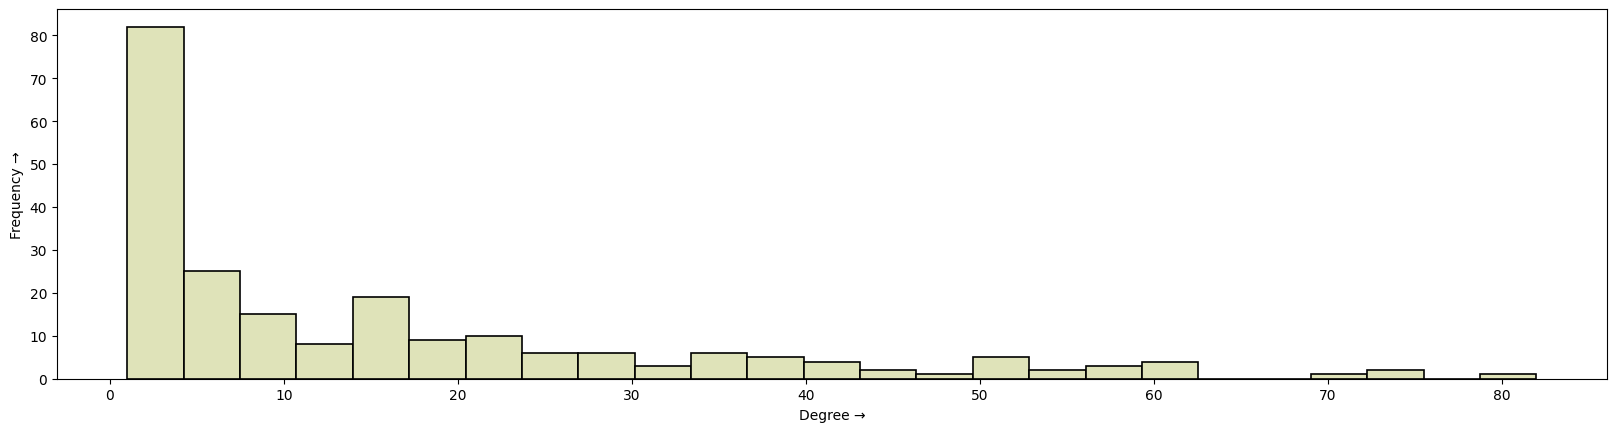

Maximum degree within the graph : 82
Minimum degree within the graph : 1
Node with max closeness centrality: DarthLysergis with value: 0.5602
Node with max page rank: redditreadred with value: 0.0196
Node with min closeness centrality: kill3rturtle with value: 0.0046
Node with min page rank: kill3rturtle with value: 0.0009


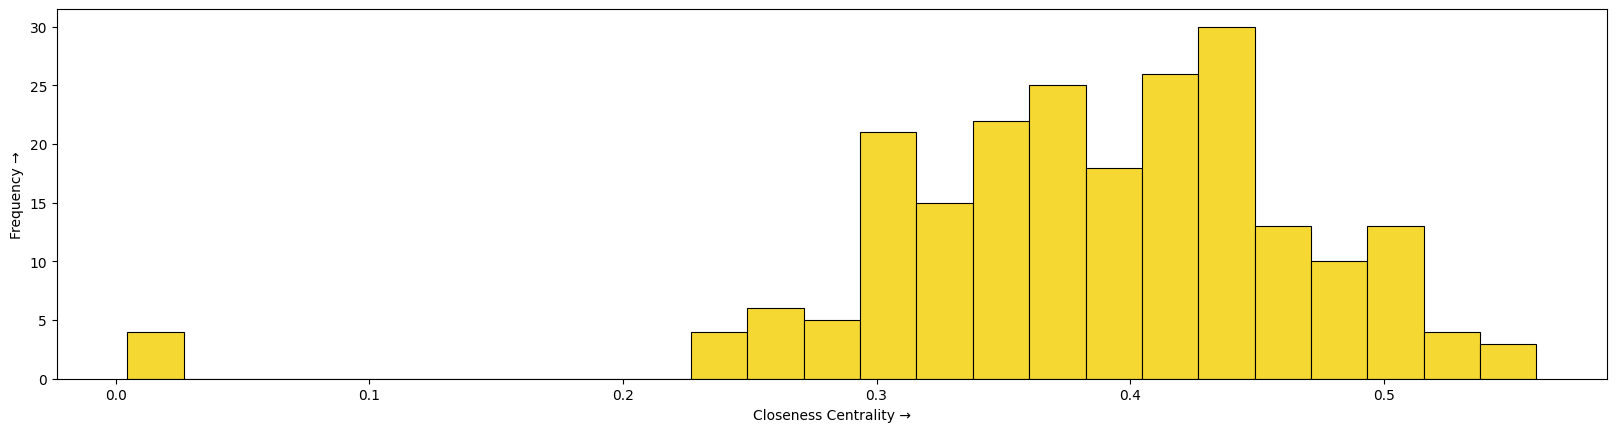

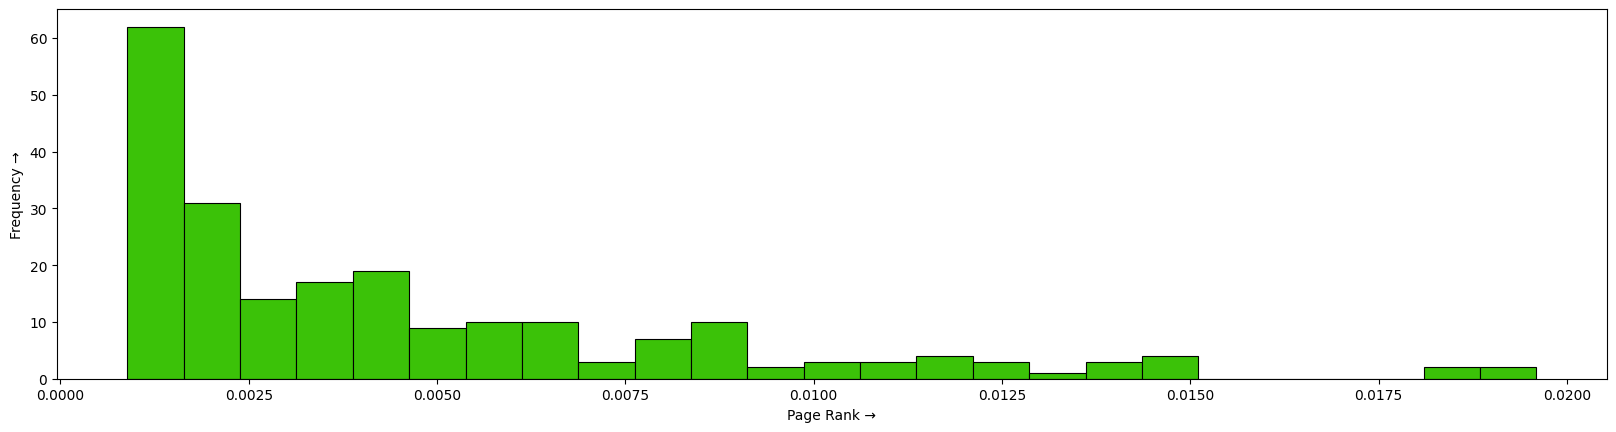

In [4]:
import matplotlib.pyplot as plt
import numpy as np

degrees = [val for (_, val) in graph.degree()] # listing all the degree nodes
plt.figure().set_figwidth(20)
plt.xlabel('Degree →')
plt.ylabel('Frequency →')
plt.hist(degrees, bins=25, edgecolor='black', linewidth=1.2, color=np.random.rand(3,)) # degree distribution
plt.show()
print(f'Maximum degree within the graph : {max(degrees)}')
print(f'Minimum degree within the graph : {min(degrees)}')

# closeness centrality
cc = nx.closeness_centrality(graph)
y = list(cc.values())
max_key = max(cc, key=cc.get) # fetching the 'Max' CLoseness Centrality within the graph
min_key = min(cc, key=cc.get) # fetching the 'Min' CLoseness Centrality within the graph

plt.figure().set_figwidth(20)
plt.xlabel('Closeness Centrality →')
plt.ylabel('Frequency →')
plt.hist(y, bins=25,edgecolor='black', linewidth=0.8, color=np.random.rand(3,))

# PageRank
pg = nx.pagerank(graph)
y = list(pg.values())
max_pg = max(pg, key=pg.get) # fetching the 'Max' Page Rank within the graph
min_pg = min(pg, key=pg.get) # fetching the 'Min' Page Rank within the graph

plt.figure().set_figwidth(20)
plt.xlabel('Page Rank →')
plt.ylabel('Frequency →')
plt.hist(y, bins=25,edgecolor='black', linewidth=0.8,color=np.random.rand(3,))

print(f'Node with max closeness centrality: {max_key} with value: {cc[max_key]:.4f}')
print(f'Node with max page rank: {max_pg} with value: {pg[max_pg]:.4f}')

print(f'Node with min closeness centrality: {min_pg} with value: {cc[min_key]:.4f}')
print(f'Node with min page rank: {min_pg} with value: {pg[min_pg]:.4f}')
